<a href="https://colab.research.google.com/github/Reniindriyani135/Tugas_Produk_Elektronik/blob/main/Tugas_Produk_Elektronik_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#pemanggilan data
data = pd.read_csv("produk_elektronik.csv")

#Soal Nomer 1

In [6]:
data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [7]:
data.tail(5)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany
549,550,Produk_550,Tablet,388.0,4.3,240.0,Germany


In [8]:
#melihat statistika deskriptif
data.describe()

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


In [10]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 7 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 550 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 550, maka akan dilakukan proses identifikasi lebih lanjut.

# Soal Nomer 2

In [11]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


In [12]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

100

Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah kolom harga, rating, jumlah_ulasan

a) Cek missing values pada dataset. Berapa jumlah missing values di setiap kolom?

Jawab:

Berdasarkan output di atas, terdapat beberapa kolom yang memiliki missing value, yaitu:

harga: 30 nilai yang hilang rating: 50 nilai yang hilang jumlah_ulasan: 20 nilai yang hilang b) Jelaskan bagaimana keberadaan missing values dapat memengaruhi analisis data.

Jawab:

Missing values dapat mengurangi akurasi model, menyebabkan bias dalam hasil analisis, serta menyulitkan perhitungan statistik dan pemrosesan data. Selain itu, data yang hilang dapat membuat sampel tidak mencerminkan kondisi sebenarnya, sehingga hasil analisis menjadi kurang dapat diandalkan. Missing values juga dapat menunjukkan pola tertentu dalam data yang perlu diperhatikan. Untuk mengatasinya, dapat dilakukan beberapa pendekatan, seperti menghapus data yang hilang atau mengisinya dengan nilai rata-rata (mean), median, atau modus (mode).

c) Tentukan metode yang paling sesuai untuk menangani missing values di setiap kolom. Berikan alasan pemilihan metode tersebut!

# Harga

# a.

In [13]:
#melihat isi dalam kolom harga
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,        nan,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  5.160e+02,  4.480e+02,  7.360e+02,  2.280e+02,
        1.830e+02,  5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,
        5.910e+02,  5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,
        4.290e+02,  2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,
        3.850e+02,  2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,
        6.070e+02,  6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,
        3.300e+02,  4.900e+02, -1.200e+01,  1.200e+02,  6.190e

Berdasarkan hasil output di atas, terlihat bahwa terdapat nilai yang ekstrem serta angka negatif. Oleh karena itu, metode yang paling sesuai untuk menggantikan nilai nan adalah metode median

In [14]:
#menghapus data yang negatif
data = data[data['harga'] > 0]

#mengganti missing value pada kolom harga
data['harga']=data['harga'].fillna(data['harga'].median())

<ipython-input-14-3311e1b2b9cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['harga']=data['harga'].fillna(data['harga'].median())


In [15]:
#melihat ulang jumlah missing value pada kolom harga
np.sum(data['harga'].isnull())

0

Berdasarkan output di atas, dapat disimpulkan bahwa tidak ada lagi nilai yang hilang pada kolom harga.

# Rating

In [16]:
#melihat isi dalam kolom rating
data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, nan,
       3.1, 4.9, 4.6, 5. , 4.8, 3.4, 4.1, 4.3, 3.3])

Dalam kasus pada kolom rating, hasil yang diperoleh kemungkinan berbentuk desimal, dengan angka yang tidak ekstrem serta rentang antara rating terendah dan tertinggi yang tidak terlalu besar. Oleh karena itu, metode yang tepat untuk menggantikan nilai yang hilang pada kolom rating adalah metode mean.

In [17]:
#mengganti missing value pada kolom rating
data['rating']=data['rating'].fillna(data['rating'].mean())

In [18]:
#melihat ulang jumlah missing value pada kolom rating
np.sum(data['rating'].isnull())

0

Berdasarkan output di atas, dapat disimpulkan bahwa kolom rating sudah tidak memiliki nilai yang hilang.

# Jumlah Ulasan

In [19]:
#melihat isi dalam kolom jumlah_ulasan
data['jumlah_ulasan'].unique()

array([273., 239., 209.,  59.,  76., 309., 390.,  67., 268.,  nan, 335.,
       139., 224., 181., 267., 111., 218., 300., 363., 480., 295., 125.,
       159., 451.,  45., 462., 342., 486., 312., 320., 217., 115., 455.,
       130.,  64., 409.,  21., 405., 145., 477.,  12., 153.,  39., 246.,
       288., 357., 113., 127.,  14., 257., 373., 158.,  93., 463., 475.,
       465., 240., 297., 170., 281., 469.,  47., 235., 151., 301., 160.,
       123.,  75., 370., 350., 484., 258., 466., 458., 340., 332., 189.,
       199., 416., 163., 205., 271., 428., 415., 436., 152., 351., 110.,
       253., 499., 248.,  58.,  51., 175.,  91., 438., 167., 225., 471.,
       143., 345.,  16., 445.,  23.,  82., 408., 172., 356., 215., 265.,
       275., 290., 262., 319., 298., 173., 104., 330., 119., 247., 396.,
       492., 434., 399.,  34., 150., 126., 491., 401., 414., 461.,  88.,
        77., 182., 453., 137., 105., 101.,  40., 343.,  29., 155., 325.,
       456., 169., 358.,  52., 263.,  69., 296., 47

Untuk menghindari munculnya angka desimal, metode yang paling sesuai untuk mengisi nilai yang hilang pada kolom tersebut adalah metode mode.

In [20]:
from scipy.stats import mode
data['jumlah_ulasan'].mode()

,jumlah_ulasan
0,492.0


In [21]:
#mengganti missing value pada kolom jumlah_ulasan
data['jumlah_ulasan'] = data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].mode()[0])

In [22]:
#melihat ulang jumlah missing value pada jumlah_ulasan
np.sum(data['jumlah_ulasan'].isnull())

0

Dari output diatas diketahui bahwa sudah tidak ada missing value di kolom jumlah_ulasan

# Soal Nomer 3

a) Indentifikasi oitler dalam dataset
   

Jawab :

Boxplot

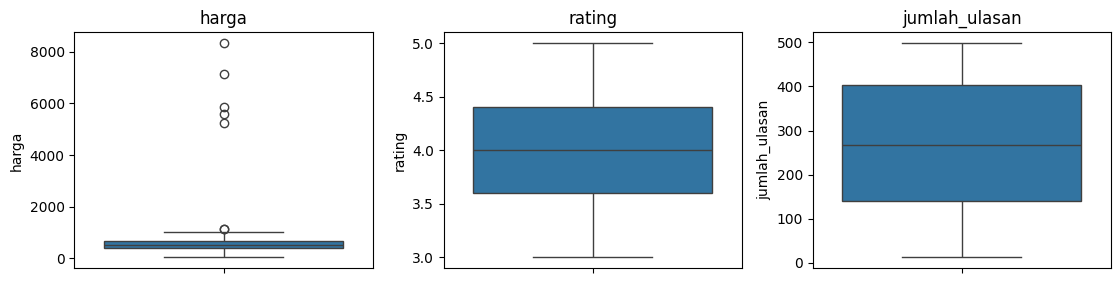

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [24]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

harga: 7 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


Dari output diatas tampak bahwa kolom harga, rating, dan jumlah_ulasan terlihat sudah seimbang, sehingga tidak diperlukan penanganan terhadap outliter.

b) Apa dampak dari keberadaan outlier terhadap analisis?

Jawab:

Outlier dapat menyebabkan bias dalam hasil analisis, memengaruhi model statistik dan machine learning, serta meningkatkan variabilitas data yang berdampak pada membesarnya standar deviasi. Selain itu, outlier juga dapat menimbulkan kesalahan dalam uji statistik dan mengganggu visualisasi data, sehingga pola distribusi menjadi sulit dibaca. Oleh karena itu, penting untuk menganalisis outlier terlebih dahulu sebelum memutuskan apakah perlu dihapus, ditransformasikan, atau dipertahankan sesuai dengan tujuan analisis.

c) Pilih metode yang sesuai untuk menangani outlier dan jelaskan alasan pemilihannya.

Jawab:

Metode yang Dipilih: Boxplot

Alasan Pemilihan: Boxplot adalah metode yang digunakan untuk memvisualisasikan distribusi data sekaligus mengidentifikasi keberadaan outlier. Metode ini menampilkan ringkasan statistik, termasuk median, kuartil pertama (Q1), kuartil ketiga (Q3), serta batas bawah dan atas data.

d) Tangani outlier dengan metode yang sesuai, atau jika memilih tidak menangani outlier berikan alasannya.

Jawab:

Dari output diatas tampak bahwa kolom harga, rating, dan jumlah_ulasan terlihat sudah seimbang, sehingga tidak diperlukan penanganan terhadap outliter.

Winsorizing (Mengganti Outler dengan Batas IQR)

In [26]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

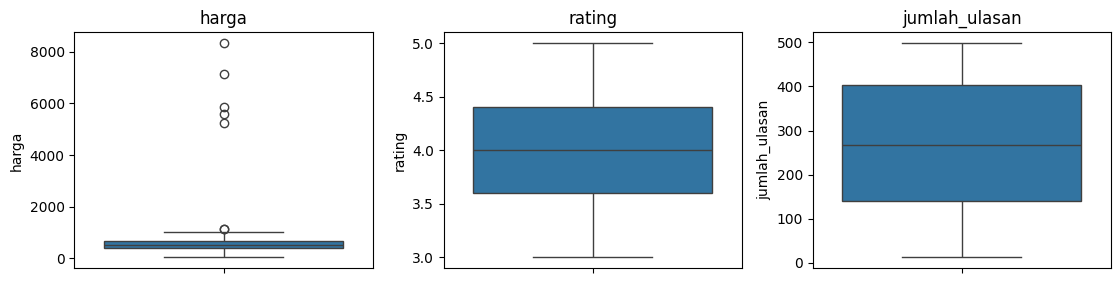

In [25]:
#cek boxplot lagi

num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Soal Nomer 4

Kolom yang memerlukan encoding yaitu kategori dan negara asal

In [27]:
#melihat isi dalam kolom
data['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

In [29]:
data['jenis'] = data ['kategori']
data = pd.get_dummies(data, columns=['jenis'], prefix='kategori')

In [29]:
# Buat dictionary untuk mapping negara ke region
country_to_region = {
    'Japan': 'Asia', 'Canada': 'America', 'South Korea': 'Asia', 'Frace': 'Europe', 'USA': 'America', 'Germany': 'Europe', 'China': 'Asia', 'India': 'Asia', 'UK': 'Europe',

}

# Assuming your column is named 'negara_asal', change 'country' to 'negara_asal'
data['country_region'] = data['negara_asal'].map(country_to_region).fillna('Others')

# One-Hot Encoding pada region
data = pd.get_dummies(data, columns=['country_region'], prefix='region')

In [30]:
#Cek ulang datanya
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 0 to 549
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   produk_id       512 non-null    int64  
 1   nama_produk     512 non-null    object 
 2   kategori        512 non-null    object 
 3   harga           512 non-null    float64
 4   rating          512 non-null    float64
 5   jumlah_ulasan   512 non-null    float64
 6   negara_asal     512 non-null    object 
 7   region_America  512 non-null    bool   
 8   region_Asia     512 non-null    bool   
 9   region_Europe   512 non-null    bool   
 10  region_Others   512 non-null    bool   
dtypes: bool(4), float64(3), int64(1), object(3)
memory usage: 34.0+ KB


In [30]:
#melihat isi dalam kolom
data['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

In [31]:
# Buat dictionary untuk mapping negara ke region
country_to_region = {
    'Japan': 'Asia', 'Canada': 'America', 'South Korea': 'Asia', 'Frace': 'Europe', 'USA': 'America', 'Germany': 'Europe', 'China': 'Asia', 'India': 'Asia', 'UK': 'Europe',

}

# Assuming your column is named 'negara_asal', change 'country' to 'negara_asal'
data['country_region'] = data['negara_asal'].map(country_to_region).fillna('Others')

# One-Hot Encoding pada region
data = pd.get_dummies(data, columns=['country_region'], prefix='region')

In [32]:
#Cek ulang datanya
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 0 to 549
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   produk_id            512 non-null    int64  
 1   nama_produk          512 non-null    object 
 2   kategori             512 non-null    object 
 3   harga                512 non-null    float64
 4   rating               512 non-null    float64
 5   jumlah_ulasan        512 non-null    float64
 6   negara_asal          512 non-null    object 
 7   kategori_Camera      512 non-null    bool   
 8   kategori_Headphone   512 non-null    bool   
 9   kategori_Laptop      512 non-null    bool   
 10  kategori_Smartphone  512 non-null    bool   
 11  kategori_Smartwatch  512 non-null    bool   
 12  kategori_Tablet      512 non-null    bool   
 13  kategori_Camera      512 non-null    bool   
 14  kategori_Headphone   512 non-null    bool   
 15  kategori_Laptop      512 non-null    bool   


b) Bandingkan berbagai metode encoding dan pilih metode yang paling sesuai untuk setiap kolom. Jelaskan alasan pemilihan metode tersebut.

Label Encoding: Mengonversi kategori menjadi angka berdasarkan urutan tertentu. Metode ini cocok untuk data yang memiliki hierarki, seperti tingkat pendidikan (SMA < S1 < S2 < S3).

One-Hot Encoding: Mengubah kategori menjadi representasi biner, sehingga lebih sesuai untuk data nominal yang tidak memiliki urutan, seperti negara asal dan jenis kelamin.

Target Encoding: Menggantikan kategori dengan rata-rata nilai dari variabel target. Teknik ini dapat digunakan pada kolom seperti kode wilayah jika terdapat korelasi dengan target, tetapi berisiko menyebabkan data leakage.

Frequency Encoding: Mengonversi kategori menjadi nilai berdasarkan frekuensi kemunculannya dalam dataset. Metode ini cocok untuk data dengan banyak kategori unik, seperti kode pos.

Pemilihan metode encoding yang tepat sangat penting untuk memastikan model bekerja secara optimal tanpa kehilangan informasi yang signifikan.